In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_data = pd.read_csv('test_FewQE9B.csv')
data = pd.read_csv('train_XnW6LSF.csv')

In [3]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Pre-Processing Data 

1.Missing Values

In [7]:
# filling missing values of continuous variables with mean

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [8]:
# filling missing values of categorical variables with mode

missing_values = data['Outlet_Size'].isnull()

mode_values = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_values[x].Outlet_Size)

In [9]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\USER\AppData\Local\Temp\ipykernel_2488\705492370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


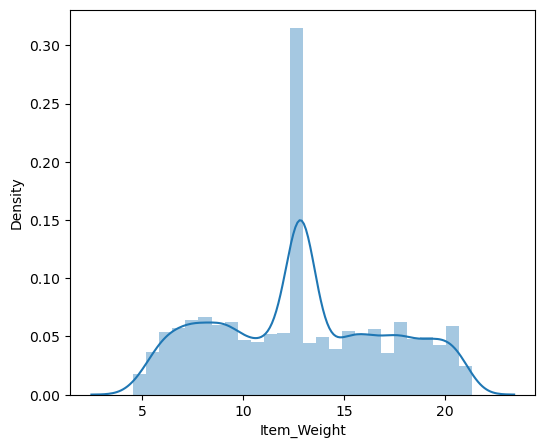

In [12]:
plt.figure(figsize = (6,5))
sns.distplot(data['Item_Weight'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2488\3752005991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


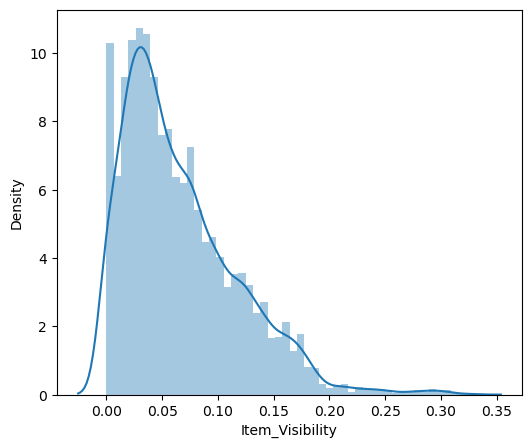

In [13]:
plt.figure(figsize = (6,5))
sns.distplot(data['Item_Visibility'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2488\2176013813.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


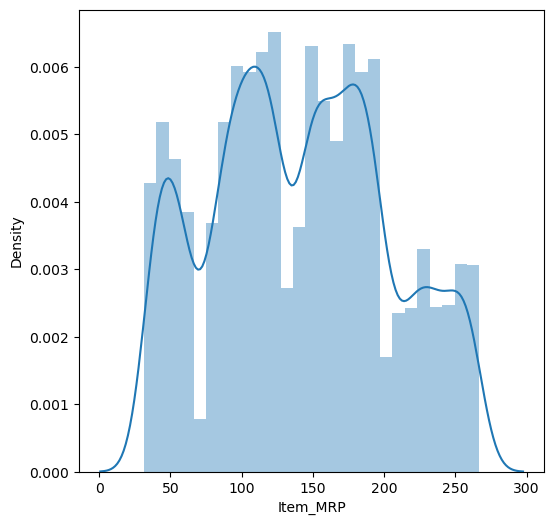

In [14]:
plt.figure(figsize = (6,6))
sns.distplot(data['Item_MRP'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2488\742078480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


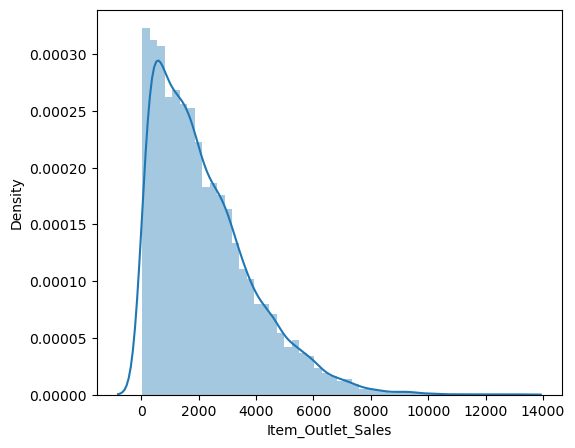

In [15]:
plt.figure(figsize = (6,5))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

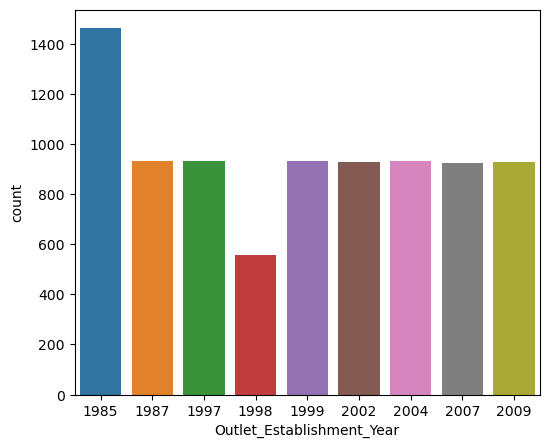

In [16]:
plt.figure(figsize = (6,5))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

2. Categorical features analysis

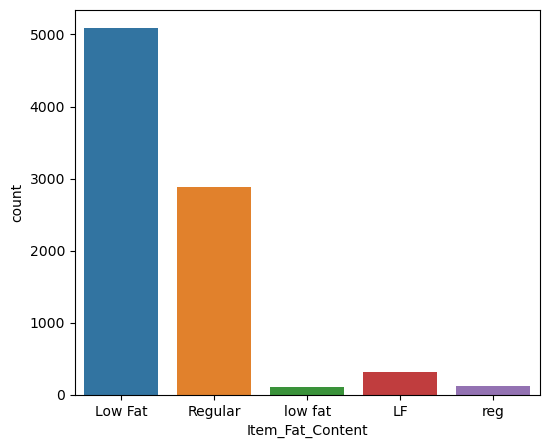

In [17]:
plt.figure(figsize = (6,5))
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

In [18]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [19]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda data: data[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

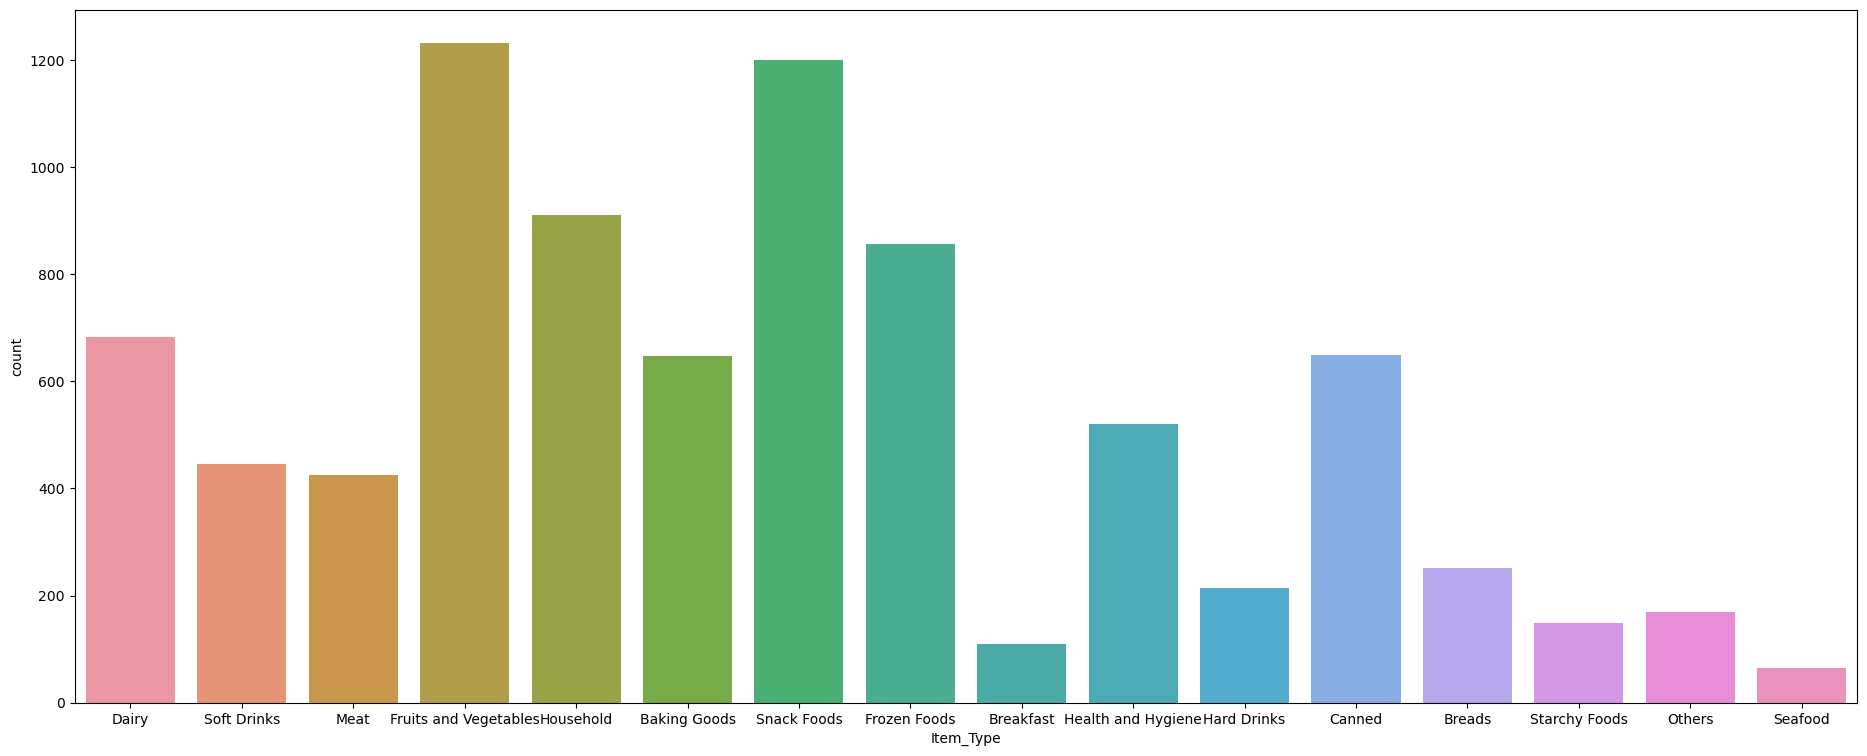

In [20]:
plt.figure(figsize = (23,9))
sns.countplot(x='Item_Type',data=data)
plt.show()

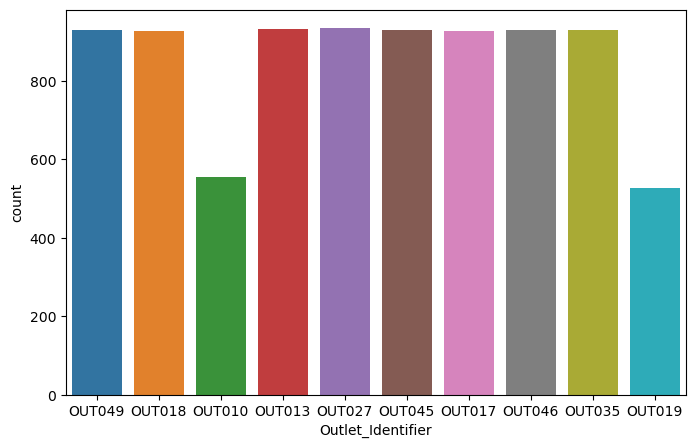

In [21]:
plt.figure(figsize = (8,5))
sns.countplot(x='Outlet_Identifier',data=data)
plt.show()

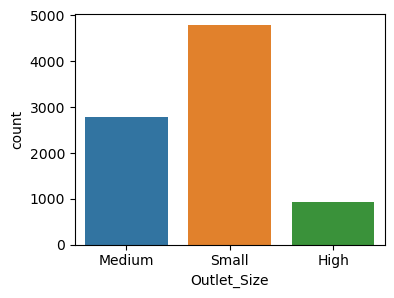

In [22]:
plt.figure(figsize = (4,3))
sns.countplot(x='Outlet_Size',data=data)
plt.show()

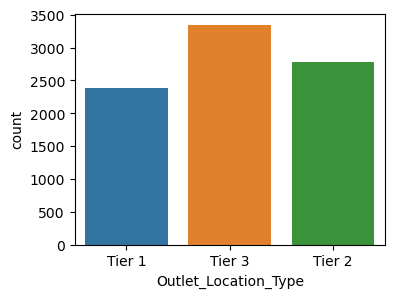

In [23]:
plt.figure(figsize = (4,3))
sns.countplot(x='Outlet_Location_Type',data=data)
plt.show()

 Categorical values to numerical

In [24]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [25]:
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

Label Encoding

In [26]:
en = LabelEncoder()

In [27]:
data['Item_Identifier'] = en.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = en.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = en.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = en.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = en.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = en.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = en.fit_transform(data['Outlet_Type'])
data['Item_Type_Combined'] = en.fit_transform(data['Item_Type_Combined'])

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


In [29]:
x = data.drop(columns ='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

In [30]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y ,test_size =0.2, random_state = 2)

In [31]:
#Importing XGBM Classifier 
from xgboost import XGBRegressor

In [32]:
#creating an extreme Gradient boosting instance
clf = XGBRegressor(random_state=2)

In [33]:
#training the model
clf.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [34]:
train_predict = clf.predict(train_x)

In [35]:
#calculating score on training data
r2_train = metrics.r2_score(train_y, train_predict)

In [36]:
print(r2_train)

0.8742980643355752


In [37]:
test_predict = clf.predict(test_x)

In [38]:
#calculating score on test data
r2_test = metrics.r2_score(test_y, test_predict)
print(r2_test)

0.5066759264975426


In [39]:
prediction = pd.DataFrame(train_predict, columns=['train_predict']).to_csv('submission.csv')